Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold, GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## EDA

### Agent Vs Hotel

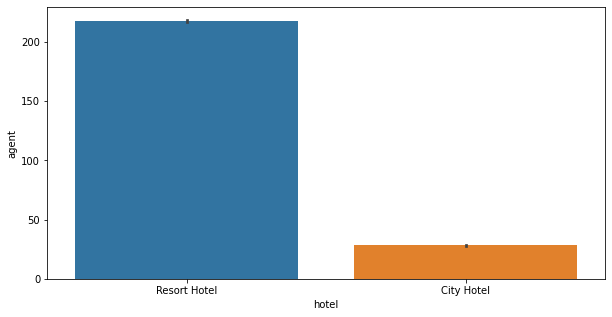

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x='hotel',y='agent',data=df)
plt.show()

Agent penjualan kamar hotel paling banyak di resort hotel di bandingan dengan city hotel

### Stay weekend Vs Date Year

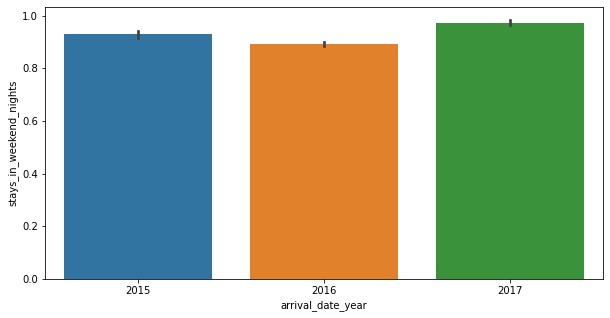

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='arrival_date_year',y='stays_in_weekend_nights',data=df)
plt.show()

Pada tahun 2017 lebih banyak orang yang stay pada saat weekend

### Number of guest, Country

In [9]:

country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())

country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

country_data.sort_values('Number of Guests', ascending=False).head(10)

,Number of Guests,Guests in %,country
PRT,21071,28.19,PRT
GBR,9676,12.95,GBR
FRA,8481,11.35,FRA
ESP,6391,8.55,ESP
DEU,6069,8.12,DEU
IRL,2543,3.40,IRL
ITA,2433,3.26,ITA
BEL,1868,2.50,BEL
NLD,1717,2.30,NLD
USA,1596,2.14,USA


In [10]:
top_10 =country_data.sort_values('Number of Guests', ascending=False).head(10)

Melihat pengunjung terbanyak berdasarkan negaara

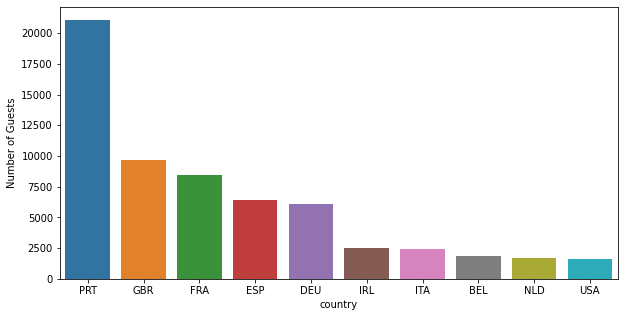

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(y='Number of Guests',x='country',data=top_10)
plt.show()

In [12]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

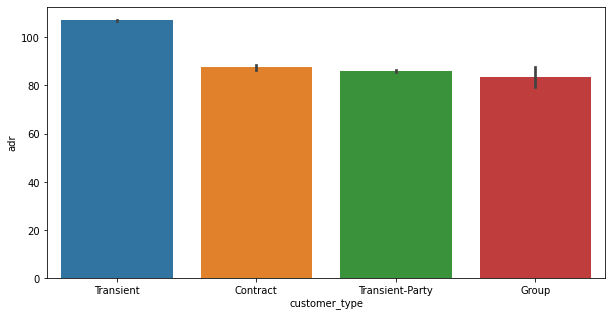

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='customer_type',y='adr',data=df)
plt.show()

Segemntasi booking include cancel

In [14]:
segments=df["market_segment"].value_counts()
segments

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [15]:
segments = pd.DataFrame(segments).reset_index()
segments.rename(columns={"index": "Market Segment",'market_segment':'Jumlah'}, inplace=True)
segments

,Market Segment,Jumlah
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237
7,Undefined,2


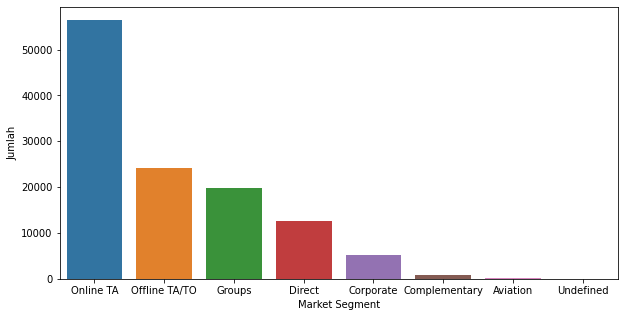

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='Market Segment',y='Jumlah',data=segments)
plt.show()

## Handling Missing Values

Melihat data yang kosong di dataset hotel booking

In [17]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

Ada 4 column data yang kosong yaitu : 

*  Company = 112593
*  Agent = 16340
*  Country = 488
*  Children = 4




In [18]:
dataset = df.copy().drop(columns=['company'])

In [19]:
dataset.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Outliers

In [20]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [23]:
Q1 = dataset[i].describe()['25%']
Q2 = dataset[i].describe()['50%']
Q3 = dataset[i].describe()['75%']

IQR = (Q3 - Q1) * 1.5
batas_bawah= Q1-IQR
batas_atas = Q3+IQR


def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

for i in dataset.describe().columns:
    if find_outlier(dataset[i].values) == []:
        print('Feature {} has NO Outliers'.format(i))
    else:
        print('Feature {} has {} Outliers '.format(i, len((find_outlier(dataset[i].values)).split(','))))

Feature is_canceled has 1 Outliers 
Feature lead_time has 107517 Outliers 
Feature arrival_date_year has 119391 Outliers 
Feature arrival_date_week_number has 117126 Outliers 
Feature arrival_date_day_of_month has 111710 Outliers 
Feature stays_in_weekend_nights has 3459 Outliers 
Feature stays_in_week_nights has 47752 Outliers 
Feature adults has 6281 Outliers 
Feature children has 78 Outliers 
Feature babies has 3 Outliers 
Feature is_repeated_guest has 1 Outliers 
Feature previous_cancellations has 318 Outliers 
Feature previous_bookings_not_canceled has 1499 Outliers 
Feature booking_changes has 1571 Outliers 
Feature agent has 95698 Outliers 
Feature days_in_waiting_list has 3682 Outliers 
Feature adr has 117396 Outliers 
Feature required_car_parking_spaces has 6 Outliers 
Feature total_of_special_requests has 2878 Outliers 


In [24]:
outliers = pd.DataFrame({'Feature': [i for i in df.describe().columns], 
              'num_of_outliers': [len((find_outlier(df[i].values)).split(',')) for i in df.describe().columns]})
outliers.sort_values(by='num_of_outliers', ascending=False)

,Feature,num_of_outliers
2,arrival_date_year,119391
17,adr,117396
3,arrival_date_week_number,117126
4,arrival_date_day_of_month,111710
1,lead_time,107517
14,agent,95698
6,stays_in_week_nights,47752
15,company,6798
7,adults,6281
16,days_in_waiting_list,3682


In [25]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Preprocessing

In [26]:
numerical_features = list(dataset.select_dtypes(exclude = [object]))
categorical_features = list(dataset.select_dtypes(include = [object]))

In [27]:
numerical_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [28]:
categorical_features 

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [29]:
dataset['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

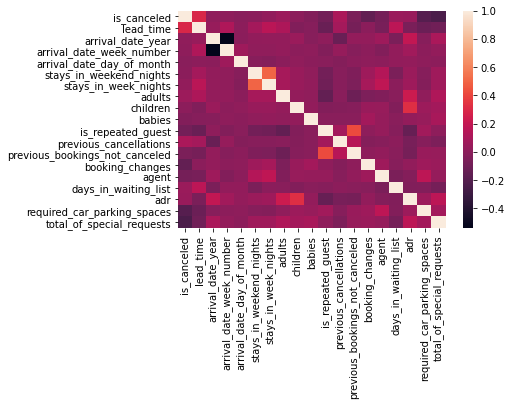

In [30]:
corelasi = dataset.corr()
sns.heatmap(corelasi)

In [31]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:].round(2)

lead_time                         0.29
total_of_special_requests         0.23
required_car_parking_spaces       0.20
booking_changes                   0.14
previous_cancellations            0.11
is_repeated_guest                 0.08
agent                             0.08
adults                            0.06
previous_bookings_not_canceled    0.06
days_in_waiting_list              0.05
adr                               0.05
babies                            0.03
stays_in_week_nights              0.02
company                           0.02
arrival_date_year                 0.02
arrival_date_week_number          0.01
arrival_date_day_of_month         0.01
children                          0.01
stays_in_weekend_nights           0.00
Name: is_canceled, dtype: float64

In [32]:
cancel_corr = dataset.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:].round(2)

lead_time                         0.29
total_of_special_requests         0.23
required_car_parking_spaces       0.20
booking_changes                   0.14
previous_cancellations            0.11
is_repeated_guest                 0.08
agent                             0.08
adults                            0.06
previous_bookings_not_canceled    0.06
days_in_waiting_list              0.05
adr                               0.05
babies                            0.03
stays_in_week_nights              0.02
arrival_date_year                 0.02
arrival_date_week_number          0.01
arrival_date_day_of_month         0.01
children                          0.01
stays_in_weekend_nights           0.00
Name: is_canceled, dtype: float64

In [39]:
dataset['is_canceled'] = dataset['is_canceled'].astype('int')

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
lead_time                         0.29
total_of_special_requests         0.23
required_car_parking_spaces       0.20
booking_changes                   0.14
previous_cancellations            0.11
is_repeated_guest                 0.08
agent                             0.08
adults       

In [75]:
X = dataset[['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations','is_repeated_guest',
 'hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'arrival_date_year']]
y = dataset['is_canceled']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
X.shape

(119390, 15)

In [78]:
onehot_encoder = ['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']
ordinal_encoder = ['arrival_date_year']

col_transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(),onehot_encoder),
    ('ordinal',OrdinalEncoder(),ordinal_encoder)
],remainder = 'passthrough')


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   lead_time                    119390 non-null  int64 
 1   total_of_special_requests    119390 non-null  int64 
 2   required_car_parking_spaces  119390 non-null  int64 
 3   booking_changes              119390 non-null  int64 
 4   previous_cancellations       119390 non-null  int64 
 5   is_repeated_guest            119390 non-null  int64 
 6   hotel                        119390 non-null  object
 7   meal                         119390 non-null  object
 8   market_segment               119390 non-null  object
 9   distribution_channel         119390 non-null  object
 10  reserved_room_type           119390 non-null  object
 11  assigned_room_type           119390 non-null  object
 12  deposit_type                 119390 non-null  object
 13  customer_type 

In [80]:
X_train

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,arrival_date_year
55159,66,0,0,2,0,0,City Hotel,BB,Online TA,TA/TO,D,D,No Deposit,Transient,2016
56190,51,0,0,0,0,0,City Hotel,BB,Online TA,TA/TO,D,D,No Deposit,Transient,2016
97444,22,2,0,0,0,0,City Hotel,BB,Online TA,TA/TO,A,B,No Deposit,Transient,2016
64854,69,0,0,2,0,0,City Hotel,BB,Online TA,TA/TO,F,F,No Deposit,Transient,2017
110580,14,2,1,0,0,0,City Hotel,HB,Direct,Direct,G,G,No Deposit,Transient,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,105,3,0,0,0,0,City Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Contract,2015
117952,127,2,0,0,0,0,City Hotel,BB,Online TA,TA/TO,D,D,No Deposit,Transient,2017
42613,8,3,0,1,0,0,City Hotel,BB,Online TA,TA/TO,D,D,No Deposit,Transient,2015
43567,141,0,0,0,0,0,City Hotel,BB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2015


In [81]:
X_train_prep = col_transformer.fit_transform(X_train)
X_test_prep = col_transformer.transform(X_test)

In [82]:
lr = LogisticRegression()
knn_c = KNeighborsClassifier(n_neighbors=5)
rf_c = RandomForestClassifier()

In [83]:
lr.fit(X_test_prep,y_test)
knn_c.fit(X_test_prep,y_test)
rf_c.fit(X_test_prep,y_test)

y_pred_lr = lr.predict(X_test_prep)
y_pred_knn = knn_c.predict(X_test_prep)
y_pred_rf_c = rf_c.predict(X_test_prep)

In [84]:
print('Logistic Regression' ,classification_report(y_test,y_pred_lr))

Logistic Regression               precision    recall  f1-score   support

           0       0.80      0.93      0.86     14934
           1       0.83      0.60      0.70      8944

    accuracy                           0.81     23878
   macro avg       0.81      0.76      0.78     23878
weighted avg       0.81      0.81      0.80     23878



In [85]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14934
           1       0.82      0.76      0.79      8944

    accuracy                           0.85     23878
   macro avg       0.84      0.83      0.83     23878
weighted avg       0.85      0.85      0.85     23878



In [87]:
print(classification_report(y_test,y_pred_rf_c))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14934
           1       0.94      0.93      0.94      8944

    accuracy                           0.95     23878
   macro avg       0.95      0.95      0.95     23878
weighted avg       0.95      0.95      0.95     23878



In [ ]:
lr_cv = cross_val_score(lr,X_train_prep,y_train,cv=2).mean()
knn_cv = cross_val_score(knn_c,X_train_prep,y_train,cv=2).mean()
rf_cv = cross_val_score(rf_c,X_train_prep,y_train,cv=2).mean()

In [ ]:
print('Logistitic Regression Cross Val :' ,lr_cv )
print('Knn Cross Val :' ,knn_cv )
print('Random Forrest Cross Val :' ,rf_cv )

In [ ]:
max_depth = [2,3]
min_samples_leaf = [1,2]
min_samples_split = [2,5]
n_estimators = [200,400,600]

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 
         'min_samples_split': min_samples_split, 'n_estimators': n_estimators}
param

In [ ]:
grid_search = GridSearchCV(
    RandomForestClassifier(n_jobs=-1),
    param,
    cv=3
)

grid_search.fit(X_train_prep, y_train)